<a href="https://colab.research.google.com/github/Aish-warya21/Inspirus/blob/master/trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

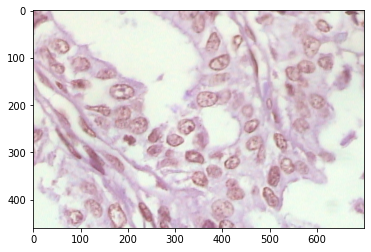

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/MyDrive/Training"

CATEGORIES = ["Malignant", "Benign"]

for category in CATEGORIES:  # divides into malignant and bengin
    path = os.path.join(DATADIR,category)  # creates path for malignant and bengin
    for img in os.listdir(path):  # iterate over each image per malignant and benign
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[[186 149 169]
  [196 157 178]
  [194 154 172]
  ...
  [182 162 161]
  [179 161 160]
  [184 166 167]]

 [[188 149 171]
  [186 146 164]
  [198 156 173]
  ...
  [185 167 166]
  [184 169 167]
  [184 168 169]]

 [[190 148 171]
  [194 149 168]
  [187 143 160]
  ...
  [198 185 183]
  [196 184 180]
  [200 187 185]]

 ...

 [[236 244 233]
  [235 245 232]
  [238 248 235]
  ...
  [235 249 238]
  [234 248 237]
  [237 251 240]]

 [[239 247 236]
  [238 248 236]
  [236 248 236]
  ...
  [237 251 239]
  [235 249 237]
  [238 249 239]]

 [[234 244 232]
  [235 245 233]
  [239 251 239]
  ...
  [236 250 238]
  [234 248 236]
  [234 245 235]]]


In [4]:
print(img_array.shape)

(460, 700, 3)


In [5]:
IMG_SIZE = 200

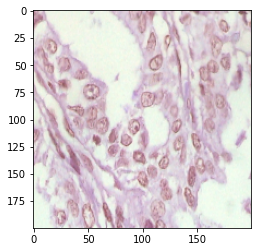

In [6]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()


100%|██████████| 1826/1826 [06:18<00:00,  4.82it/s]


In [8]:
print(len(training_data))

4581


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
0
0
1
0
0


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()
            
            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
             
            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1616685458
Epoch 1/10
101/101 [==============================] - 55s 534ms/step - loss: 2.5027 - accuracy: 0.5588 - val_loss: 0.6482 - val_accuracy: 0.6400
Epoch 2/10
101/101 [==============================] - 54s 533ms/step - loss: 0.6623 - accuracy: 0.6128 - val_loss: 0.6455 - val_accuracy: 0.6407
Epoch 3/10
101/101 [==============================] - 54s 534ms/step - loss: 0.6520 - accuracy: 0.6389 - val_loss: 0.6388 - val_accuracy: 0.6255
Epoch 4/10
101/101 [==============================] - 54s 539ms/step - loss: 0.5990 - accuracy: 0.6608 - val_loss: 0.6326 - val_accuracy: 0.6225
Epoch 5/10
101/101 [==============================] - 55s 544ms/step - loss: 0.5371 - accuracy: 0.7430 - val_loss: 0.6904 - val_accuracy: 0.5280
Epoch 6/10
101/101 [==============================] - 56s 553ms/step - loss: 0.4679 - accuracy: 0.7979 - val_loss: 0.6807 - val_accuracy: 0.5687
Epoch 7/10
101/101 [==============================] - 56s 554ms/step - loss: 0.3751 - accuracy: